In [82]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
import matplotlib.patches as patches

annotation_file = 'OCHuman/ochuman_coco_format_test_range_0.00_1.00.json'
annot_2 = 'OCHuman/ochuman_coco_format_val_range_0.00_1.00.json'
image_dir = 'OCHuman/images'

coco1 = COCO(annotation_file)

image_ids1 = coco1.getImgIds()
coco2 = COCO(annot_2)
image_ids2 = coco2.getImgIds()

categories = coco1.loadCats(coco1.getCatIds())
category_names = {category['id']: category['name'] for category in categories}
print("Categories:", category_names)

image_info = coco1.loadImgs(image_ids1[2])[0]
image_path = os.path.join(image_dir, image_info['file_name'])
image = Image.open(image_path)

ann_ids = coco1.getAnnIds(imgIds=image_info['id'])
annotations = coco1.loadAnns(ann_ids)

# print("Annotations:", annotations)
len(image_ids1), len(image_ids2), len(image_ids1) + len(image_ids2)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Categories: {1: 'person'}


(2231, 2500, 4731)

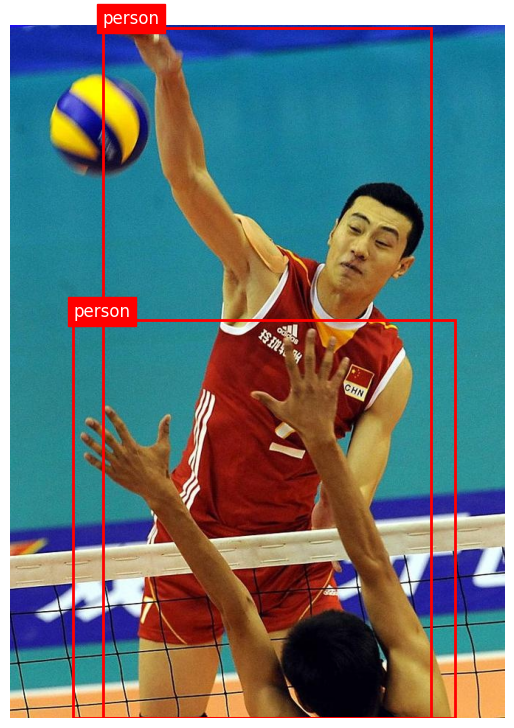

In [83]:
def plot_image_with_annotations(image, annotations):
    img_np = np.array(image)
    
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img_np)
    
    for annotation in annotations:
        bbox = annotation['bbox']
        category_id = annotation['category_id']
        category_name = category_names[category_id]
        
        xmin, ymin, width, height = bbox
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        plt.text(xmin, ymin - 5, category_name, color='white', fontsize=12, backgroundcolor='red')
    
    plt.axis('off')
    plt.show()

plot_image_with_annotations(image, annotations)


In [84]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

with open('OCHuman/ochuman.json') as f:
    ochuman_data = json.load(f)
len(ochuman_data['images'])

5081

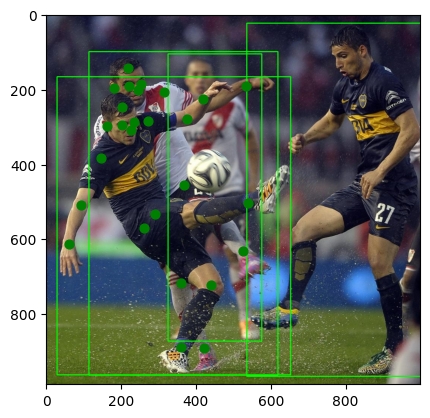

In [85]:
import cv2
image_dir = 'OCHuman/images'

image_info = ochuman_data['images'][10]
annotations = ochuman_data['images'][10]['annotations']

image_path = os.path.join(image_dir, image_info['file_name'])
image = cv2.imread(image_path)
fig, ax = plt.subplots(1)


for ann in annotations:
    bbox = ann['bbox']
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    keypoints = np.array(ann['keypoints'])
    if keypoints.size % 3 == 0:
        keypoints = keypoints.reshape(-1, 3)
        for keypoint in keypoints:
            if keypoint[2] == 1:
                ax.scatter(keypoint[0], keypoint[1], c='g', s=40)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
